## <span id='import-lib'  style='font-weight:bold;color:white'> 1.Importing Libraries <hr></span>

In [1]:
#importing libraries

import os
from PIL import Image
import numpy as np
from shutil import copyfile
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from IPython.core.display import HTML,display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision


## <span id='walk-through'  style='font-weight:bold;color:white'> 2.Walk Through Input Directory <hr></span>

In [2]:
"""
Defining function

Accepts the directory name as an argument and prints the contents of each directory in order.
It prints the subdirectories and the number of images they contain.
"""

def walk_through_dir(directory_name):
    
    """
    Python method OS.walk() generate the file names in a directory tree by walking the tree
    either top-down or bottom-up. For each directory in the tree rooted at directory top
    (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).

    root : Prints out directories only from what you specified.
    dirs : Prints out sub-directories from root.
    files : Prints out all files from root and directories.
    """

    for dirpaths,dirnames,filenames in os.walk(directory_name):
        text=" <span style='color:gray'><b>"+f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpaths}'"+"</b></span><hr>"
        display(HTML(text))

In [3]:
"""
Call function walk_through_dir
"""

walk_through_dir('01_data')

## <span id='train-test-split'  style='font-weight:bold;color:white'> 3.Split Data into train and test <hr></span>

In [4]:
"""
os.mkdir() method in Python is used to create a directory named path with the specified numeric mode.
This method raise FileExistsError if the directory to be created already exists.
"""

os.mkdir('./02_train_test_split')
os.mkdir('./02_train_test_split/train')
os.mkdir('./02_train_test_split/test')

In [5]:

input_data_dir='01_data'

"""
os.listdir() method in python is used to get the list of all files and directories
in the specified directory. If we don’t specify any directory, then list of files and directories
in the current working directory will be returned.
"""

"""
os.path.join() method in Python join one or more path components intelligently. 
This method concatenates various path components with exactly one directory separator (‘/’) 
following each non-empty part except the last path component. 
If the last path component to be joined is empty then a directory separator (‘/’) is put at the end. 
"""

"""
The Image.open() method passes the path to the image file as an argument and returns an Image object. 
The Method saves this Image object and allows to perform image operations on it. 
"""

"""
Tensorflow operation tf.io.read_file() returns a tensor with the entire contents of the input filename. 
It does not do any parsing, it just returns the contents as they are.
"""

"""
Tensorflow operation tf.image.decode_image detects whether an image is a BMP, GIF, JPEG, or PNG, 
and performs the appropriate operation to convert the input bytes string into a Tensor of type dtype.
"""

"""
numpy.ndarray.ndim() method returns the number of dimensions of an array. 
"""

for folder in os.listdir(input_data_dir):
    files=os.listdir(os.path.join(input_data_dir,folder))
    images=[]
    for f in files:
        try:
            img=Image.open(os.path.join(input_data_dir,folder,f))
            img=tf.io.read_file(os.path.join(input_data_dir,folder,f))
            img=tf.image.decode_image(img)
            if img.ndim == 3: #In color images, the information for each pixel requires a tuple of numbers to represent. So we need a three-dimensional matrix to represent an image. Almost all colors in nature can be composed of three colors: red (R), green (G), and blue (B). So each pixel can be represented by a red/green/blue tuple in an RGB image.
                images.append(f) # The append() method appends an element to the end of the list.
        except:
            pass
                      
    random.shuffle(images) #Shuffle a list (reorganize the order of the list items)

    count=len(images) #Return the number of elements in the array

    split=int(0.8*count) # 80% Train / 20% split per folder
    
    #creating directory using os.mkdir() method for train/test split
    os.mkdir(os.path.join('./02_train_test_split/train',folder))
    os.mkdir(os.path.join('./02_train_test_split/test',folder))

    """
    The shutil.copyfile() method in Python is used to copy the content 
    of the source file to the destination file. 
    """
    
    """
    The range() function returns a sequence of numbers, starting from 0 by default, 
    and increments by 1 (by default), and ends at a specified number. 
    However it is possible to specify the starting value by adding a parameter.
    """
    
    for r in range(split):
        source_file=os.path.join(input_data_dir,folder,images[r])
        destination=os.path.join('./02_train_test_split/train',folder,images[r])
        copyfile(source_file,destination)
        
    for r in range(split,count):
        source_file=os.path.join(input_data_dir,folder,images[r])
        destination=os.path.join('./02_train_test_split/test',folder,images[r])
        copyfile(source_file,destination)   

2022-09-07 16:42:18.621938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/janickbrunner/opt/anaconda3/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


## <span id='walk-through-train'  style='font-weight:bold;color:white'> 4.Walk Through train Data Directory <hr></span>

In [4]:
"""
Call function walk_through_dir
"""

walk_through_dir('./02_train_test_split/train')

## <span id='walk-through-test'  style='font-weight:bold;color:white'> 5.Walk Through test Data Directory <hr></span>

In [5]:
"""
Call function walk_through_dir
"""

walk_through_dir('./02_train_test_split/test')

## <span id='viz-data'  style='font-weight:bold;color:white'> 6.Visualizing the Training Data <hr></span>

In [13]:
"""
Turtle Method is used to change the color of the turtle. 
The default color is black.
"""

from turtle import color

"""
Defining function
takes the directory as input and prints 6 random images from the randomly choosen class.
"""

"""
The random.choice() method returns a randomly selected element from the specified sequence.
"""

"""
The random.sample() is an inbuilt function of random module in Python that returns a particular length
list of items chosen from the sequence i.e. list, tuple, string or set.
"""

"""
The figure() function in pyplot module of matplotlib library is used to create a new figure.
figsize = These parameter are the width, height in inches.
"""

def plot_random_image(target_dir):
    
    display(HTML('<H3 style="color:gray"> <b>Visualization of Samples</b></H3><hr>'))
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),6)
    plt.figure(figsize=(20,5))
    
    for i in range(6):
        
        """
        pyplot.subplots creates a figure and a grid of subplots with a single call, 
        while providing reasonable control over how the individual plots are created.
        
        The first two optional arguments of pyplot.subplots define the number of rows and columns 
        of the subplot grid. The third argument represents the index of the current plot.
        """
        
        """
        plt. show() starts an event loop, looks for all currently active figure objects, 
        and opens one or more interactive windows that display your figure or figures
        """
        
        plt.subplot(1,6,i+1)
        img=tf.io.read_file(os.path.join(target_folder,random_image[i]))
        img=tf.io.decode_image(img)
        img=tf.image.resize(img,(224,244)) # image shape
        plt.imshow(img/255.0)
        plt.title(f'{target_class}\n{img.shape}',size=20, color="white")
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout() #Adjust the padding between and around subplots.
    plt.show()
    display(HTML('<hr>'))

In [14]:
train_dir='./02_train_test_split/train'
test_dir='./02_train_test_split/test'

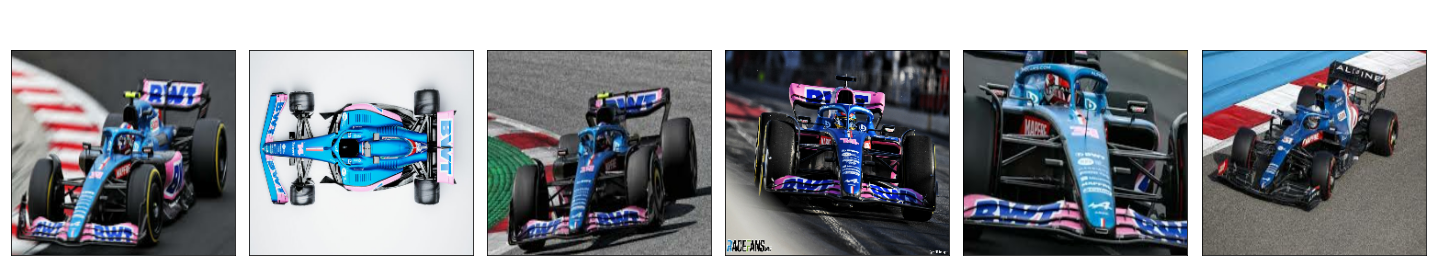

In [15]:
"""
Call function plot_random_image
"""

plot_random_image(train_dir)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 7.Converting Data to ImageDatasets <hr></span>

In [16]:
IMAGE_SIZE=(224,224)

"""
tf.keras.preprocessing.image_dataset_from_directory
turns image files sorted into class-specific folders into a labelded dataset of image tensors
"""

train_data=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, #Directory where the data is located.
    label_mode='categorical', #'categorical' means that the labels are encoded as a categorical vector
    image_size=IMAGE_SIZE #Size to resize images to after they are read, specified as (height, width).
)
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical', 
    image_size=IMAGE_SIZE,
    shuffle=False #If set to False, sorts the data in alphanumeric order.
)

Found 2324 files belonging to 8 classes.
Found 875 files belonging to 8 classes.


In [17]:
class_names=train_data.class_names #This is the explicit list of class names (must match subdirectories). 
print(class_names)

['Alfa Tauri', 'Alpine', 'Aston Martin', 'Ferrari', 'Mc Laren', 'Mercedes', 'Red Bull', 'Sauber']


In [17]:

"""
The tf.data API provides the tf.data.Dataset.prefetch transformation. 
It can be used to decouple the time when data is produced from the time when data is consumed. 
In particular, the transformation uses a background thread and an internal buffer
to prefetch elements from the input dataset ahead of the time they are requested.

The number of elements to prefetch should be equal to (or possibly greater than)
the number of batches consumed by a single training step. 
You could either manually tune this value, or set it to tf.data.AUTOTUNE,
which will prompt the tf.data runtime to tune the value dynamically at runtime.
"""


train_data=train_data.prefetch(tf.data.AUTOTUNE)
test_data=test_data.prefetch(tf.data.AUTOTUNE)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 8.1 Building Model <hr></span>

In [54]:
"""
Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model 
during training to make it run faster and use less memory. 

The Keras mixed precision API allows you to use a mix of either float16 or bfloat16 with float32,
to get the performance benefits from float16/bfloat16 and the numeric stability benefits from float32.
"""

mixed_precision.set_global_policy('mixed_float16')

inputs=layers.Input(shape=(224,224,3),name='input_layer')

"""
Using keras application "EfficientNetV2B0"
This function returns a Keras image classification model, 
optionally loaded with weights pre-trained on ImageNet.

See PDF
"""

base_model=tf.keras.applications.EfficientNetV2B0(include_top=False)
#Do not include the ImageNet classifier at the top.

"""
It is important to freeze the convolutional base before you compile and train the model. 
Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being 
updated during training. MobileNet V2 has many layers, so setting the entire model's trainable 
flag to False will freeze all of them.

If you set trainable = False on a model or on any layer that has sublayers, 
all children layers become non-trainable as well.
"""

base_model.trainable=False ## Freeze the outer model
x=base_model(inputs,training=False) #We make sure that the base_model is running in inference mode here,
                                    # by passing `training=False`. This is important for fine-tuning 

# Convert features of shape `base_model.output_shape[1:]` to vectors
x=layers.GlobalAveragePooling2D(name='Global_Average_Pool_2D')(x)

#Softmax converts a vector of values to a probability distribution.
#The elements of the output vector are in range (0, 1) and sum to 1.
num_classes=len(class_names)
outputs=layers.Dense(num_classes,activation='softmax',dtype=tf.float32,name="Output_layer")(x)


model=keras.Model(inputs,outputs,name="model")

In [ ]:
"""
Call tf.keras.Model.save to save a model's architecture, weights, and training configuration
in a single file/folder. This allows you to export a model so it can be used without access
to the original Python code
"""

model.save_weights('initial_weights.ckpt')

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 8.2 Compile Model <hr></span>

In [63]:
#We specify the training configuration (optimizer, loss, metrics):

model.compile(
    optimizer=keras.optimizers.Adam(), # Optimizer that implements the Adam algorithm.
    loss=keras.losses.categorical_crossentropy, #Computes the cross-entropy loss between true labels and predicted labels.
    metrics=['accuracy'] #Calculates how often predictions equal labels.
)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 8.3 Model Summary <hr></span>

In [64]:
model.summary() #Prints a string summary of the network.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 Global_Average_Pool_2D (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 Output_layer (Dense)        (None, 8)                 10248     
                                                                 
Total params: 5,929,560
Trainable params: 10,248
Non-trainable params: 5,919,312
_________________________________________________________________


In [65]:
"""
For what?
"""

# verifying the dtypes after opting for mixed precision
for layer in model.layers:
    print(layer.name,layer.trainable,layer.dtype_policy)

input_layer True <Policy "float32">
efficientnetv2-b0 False <Policy "mixed_float16">
Global_Average_Pool_2D True <Policy "mixed_float16">
Output_layer True <Policy "float32">


## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 8.4. Fit Model <hr></span>

In [67]:
"""
Defining function
Takes the path where to save the best model weights obtained during training.
"""

def create_model_check_point_callback(checkpoint_path,monitor='val_loss'):
   
    model_checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(
        
        monitor=monitor,#
        filepath=checkpoint_path,
        save_best_only=True, #if save_best_only=True, it only saves when the model is considered the 
        #"best" and the latest best model according to the quantity monitored will not be overwritten.
        save_weights_only=True, #if True, then only the model's weights will be saved 
        save_freq='epoch', #When using 'epoch', the callback saves the model after each epoch.
        verbose=1 #Verbosity mode 1 displays messages when the callback takes an action.
    )
    return model_checkpoint_cb

In [68]:
ModelCheckPoint_model_cb=create_model_check_point_callback('./ModelCheckPoints/model.ckpt')
EPOCHS=5

#Trains the model 20% of the train data batches
history_of_model=model.fit(
    train_data,
    
    epochs=EPOCHS, #Number of epochs to train the model. An epoch is an iteration over the entire 
    #data provided
    
    steps_per_epoch=int (0.2*len(train_data)), #Total number of steps (batches of samples) before 
    #declaring one epoch finished and starting the next epoch.
    
    validation_data=test_data, #The model will set apart this fraction of the training data, 
    #will not train on it, and will evaluate the loss and any model metrics on this data at 
    #the end of each epoch.
    
    validation_steps=len(test_data), #Total number of steps (batches of samples) to draw before
    #stopping when performing validation at the end of every epoch.
    
    callbacks=[ModelCheckPoint_model_cb] #List of callbacks to apply during training
    #Callbacks can be passed to keras methods such as fit, evaluate, and predict in order to hook
    #into the various stages of the model training and inference lifecycle.
)

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 2.0930 - accuracy: 0.1589  
Epoch 1: val_loss improved from inf to 1.96775, saving model to ./ModelCheckPoints/model.ckpt
12/12 [==============================] - 3384s 294s/step - loss: 2.0930 - accuracy: 0.1589 - val_loss: 1.9677 - val_accuracy: 0.2428
Epoch 2/5
12/12 [==============================] - ETA: 0s - loss: 1.8996 - accuracy: 0.2917  
Epoch 2: val_loss improved from 1.96775 to 1.81009, saving model to ./ModelCheckPoints/model.ckpt
12/12 [==============================] - 3422s 299s/step - loss: 1.8996 - accuracy: 0.2917 - val_loss: 1.8101 - val_accuracy: 0.3807
Epoch 3/5
12/12 [==============================] - ETA: 0s - loss: 1.7517 - accuracy: 0.4505  
Epoch 3: val_loss improved from 1.81009 to 1.67296, saving model to ./ModelCheckPoints/model.ckpt
12/12 [==============================] - 3210s 280s/step - loss: 1.7517 - accuracy: 0.4505 - val_loss: 1.6730 - val_accuracy: 0.5350
Epoch 4/5
12/12 [=========

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 8.4. Result and learning curves <hr></span>

In [69]:
# Checkpoints saved by Model.save_weights should be loaded using Model.load_weights
model.load_weights('./ModelCheckPoints/model.ckpt')

In [70]:
#Returns the loss value & metrics values for the model in test mode.
test_loss,test_acc=model.evaluate(test_data)

16/16 [==============================] - 1788s 111s/step - loss: 1.4765 - accuracy: 0.5309


In [72]:
text="<hr><span style='font-weight:bold; color:white'>"+f"Loss on Test Dataset: <b style='font-weight:bold; color:red'>{test_loss:.4f}</b>"+f"<br><br> Accuracy on Test Dataset: <b style='font-weight:bold; color:red'>{test_acc*100:.2f}%</b>"+"</span><hr>"
display(HTML(text))

In [75]:
"""
Define Function
Returns seperate loss curves for training and validation metrics
"""

def plot_loss_curves(history):
    
    display(HTML("<h3 style='text-align:center; font-weight:bold; color:white'> Model Performance Curves</h3><hr>"))
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(20,7))
    
  # plot loss data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('loss',size=20)
    plt.legend(fontsize=15, loc="upper right");
  # plt.show()

  # plot accuracy data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('Accuracy',size=20)
    plt.tight_layout()
    plt.legend(fontsize=15, loc="lower right");

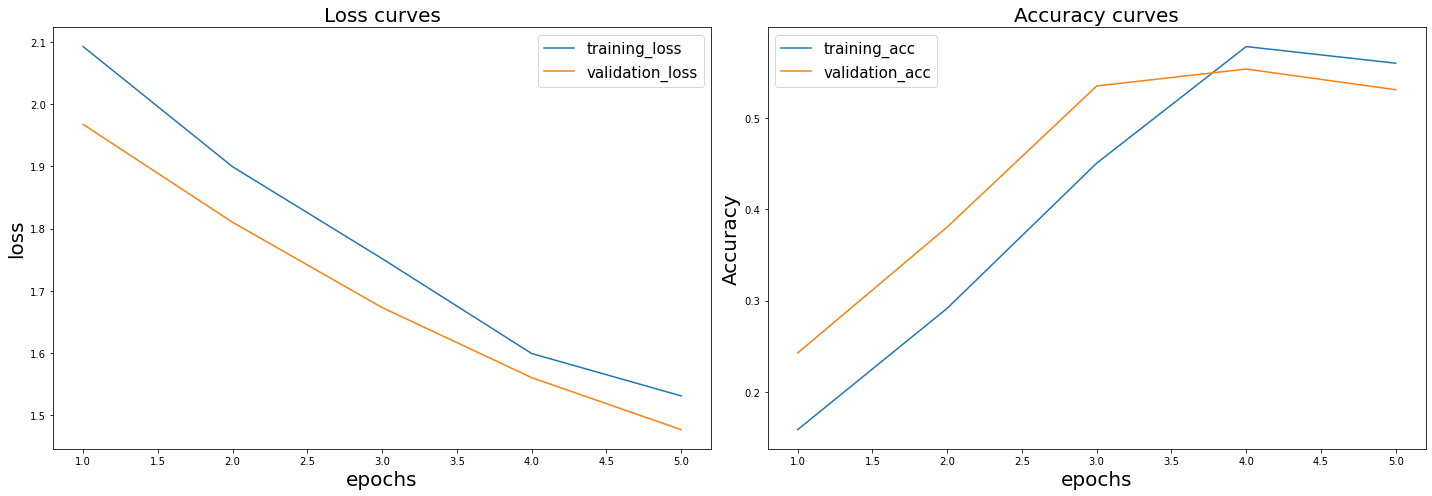

In [76]:
"""
Call Function
"""

plot_loss_curves(history_of_model)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 9.0 Model 2.0 - Load the initial weights of the model <hr></span>

In [77]:
## Checkpoints saved by Model.save_weights should be loaded using Model.load_weights
model.load_weights('initial_weights.ckpt')

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 9.1 Model 2.0 - Compile Model <hr></span>

In [78]:
#We specify the training configuration (optimizer, loss, metrics):

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 9.1 Model 2.0 - Fit Model <hr></span>

In [79]:
ModelCheckPoint_model_cb=create_model_check_point_callback('./ModelCheckPoints/model_1.ckpt')
EPOCHS=5
history_of_model_1=model.fit(
    train_data,
    epochs=EPOCHS,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[ModelCheckPoint_model_cb]
)

Epoch 1/5
61/61 [==============================] - ETA: 0s - loss: 1.7802 - accuracy: 0.3984  
Epoch 1: val_loss improved from inf to 1.46838, saving model to ./ModelCheckPoints/model_1.ckpt
61/61 [==============================] - 9102s 149s/step - loss: 1.7802 - accuracy: 0.3984 - val_loss: 1.4684 - val_accuracy: 0.5576
Epoch 2/5
61/61 [==============================] - ETA: 0s - loss: 1.2512 - accuracy: 0.7028  
Epoch 2: val_loss improved from 1.46838 to 1.13463, saving model to ./ModelCheckPoints/model_1.ckpt
61/61 [==============================] - 9183s 151s/step - loss: 1.2512 - accuracy: 0.7028 - val_loss: 1.1346 - val_accuracy: 0.7284
Epoch 3/5
61/61 [==============================] - ETA: 0s - loss: 0.9749 - accuracy: 0.8140  
Epoch 3: val_loss improved from 1.13463 to 0.94099, saving model to ./ModelCheckPoints/model_1.ckpt
61/61 [==============================] - 14265s 235s/step - loss: 0.9749 - accuracy: 0.8140 - val_loss: 0.9410 - val_accuracy: 0.8066
Epoch 4/5
61/61 [==

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 9.1 Model 2.0 - Result and learning curves <hr></span>

In [80]:
model.load_weights('./ModelCheckPoints/model_1.ckpt')

In [81]:
test_loss,test_acc=model.evaluate(test_data)

16/16 [==============================] - 1794s 111s/step - loss: 0.7217 - accuracy: 0.8498


In [83]:
text="<hr><span style='font-weight:bold; color:white'>"+f"Loss on Test Dataset: <b style='font-weight:bold; color:red'>{test_loss:.4f}</b>"+f"<br><br> Accuracy on Test Dataset: <b style='font-weight:bold; color:red'>{test_acc*100:.2f}%</b>"+"</span><hr>"
display(HTML(text))

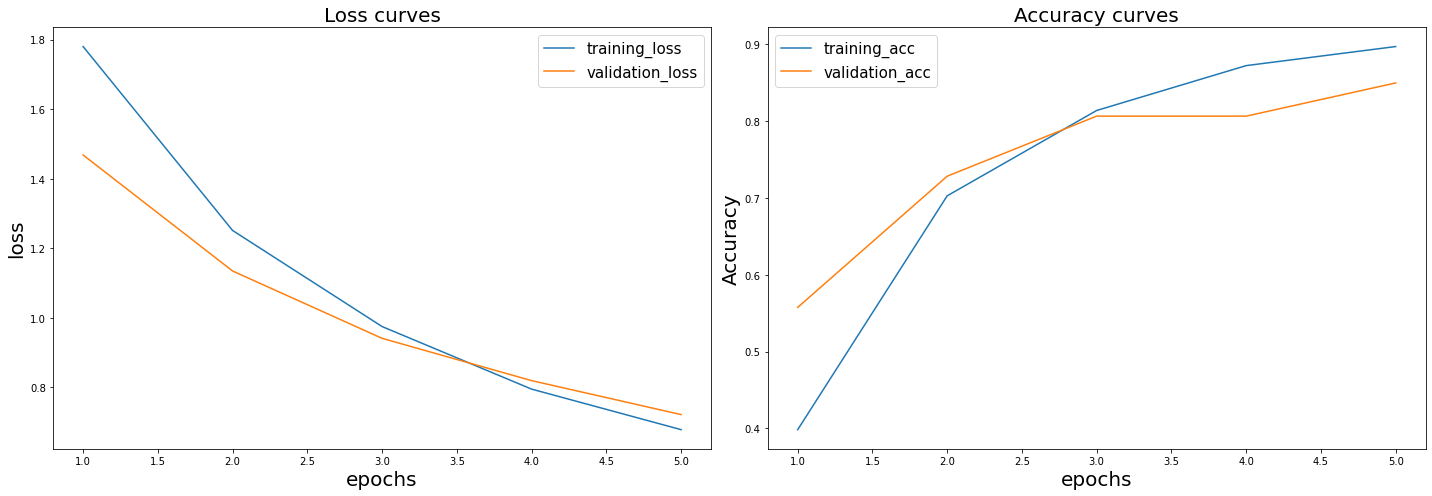

In [84]:
plot_loss_curves(history_of_model_1)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 10.0 Model 3.0 - Unfreezing the Top-10 layers <hr></span>

In [85]:
# unfreezing the top 10 layers
#see websites
model.layers[1].trainable=True
for layer in model.layers[1].layers[:-10]:
    layer.trainable=False

In [86]:
# checking the number of trainable layers in feature extraction model
len(model.layers[1].trainable_variables)

10

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 10.0 Model 3.0 - Recompile the model

In [87]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=1e-4), #comment!
    metrics=['accuracy']
)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 10.0 Model 3.0 - Fit the model

In [88]:
ModelCheckPoint_model_cb=create_model_check_point_callback('./ModelCheckPoints/model_2.ckpt')

"""
tf.keras.callbacks.EarlyStopping
Stop training when a monitored metric has stopped improving.
-> patience: Number of epochs with no improvement after which training will be stopped.
-> restore_best_weights: Whether to restore model weights from the epoch with the best value of 
the monitored quantity.
-> Verbosity mode 1 displays messages when the callback takes an action.

tf.keras.callbacks.ReduceLROnPlateau
Reduce learning rate when a metric has stopped improving.
-> factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
-> patience: number of epochs with no improvement after which learning rate will be reduced.
-> min_delta: threshold for measuring the new optimum, to only focus on significant changes.
-> min_lr: lower bound on the learning rate.
-> Verbosity mode 1 displays messages when the callback takes an action.
"""


early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True,verbose=1)
# defining reduce learning rate on plateau callback
reduce_lr_cb=tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,patience=3,min_delta=1e-3,min_lr=1e-7,verbose=1)
fine_tune_epoch=EPOCHS+25 # total sum = 30
history_of_model_2=model.fit(
    train_data,
    epochs=fine_tune_epoch,
    initial_epoch=EPOCHS-1,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[ModelCheckPoint_model_cb,early_stopping_cb,reduce_lr_cb]
)

Epoch 5/30
61/61 [==============================] - ETA: 0s - loss: 0.4249 - accuracy: 0.9147  
Epoch 5: val_loss improved from inf to 0.40268, saving model to ./ModelCheckPoints/model_2.ckpt
61/61 [==============================] - 10507s 173s/step - loss: 0.4249 - accuracy: 0.9147 - val_loss: 0.4027 - val_accuracy: 0.8889 - lr: 1.0000e-04
Epoch 6/30
61/61 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.9323  
Epoch 6: val_loss improved from 0.40268 to 0.32902, saving model to ./ModelCheckPoints/model_2.ckpt
61/61 [==============================] - 15112s 249s/step - loss: 0.2678 - accuracy: 0.9323 - val_loss: 0.3290 - val_accuracy: 0.9033 - lr: 1.0000e-04
Epoch 7/30
61/61 [==============================] - ETA: 0s - loss: 0.1993 - accuracy: 0.9556  
Epoch 7: val_loss improved from 0.32902 to 0.28816, saving model to ./ModelCheckPoints/model_2.ckpt
61/61 [==============================] - 42964s 714s/step - loss: 0.1993 - accuracy: 0.9556 - val_loss: 0.2882 - v

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 10.0 Model 3.0 - Result and learning curves

In [89]:
model.load_weights('./ModelCheckPoints/model_2.ckpt')

In [90]:
test_loss,test_acc=model.evaluate(test_data)

16/16 [==============================] - 1799s 112s/step - loss: 0.2295 - accuracy: 0.9342


In [91]:
text="<hr><span style='font-weight:bold; color:'>"+f"Loss on Test Dataset: <b style='font-weight:bold; color:red'>{test_loss:.4f}</b>"+f"<br><br> Accuracy on Test Dataset: <b style='font-weight:bold; color:red'>{test_acc*100:.2f}%</b>"+"</span><hr>"
display(HTML(text))

In [94]:
    """
    Define Function
    the function accepts the histories of a model before and after fine-tunning.
    initial_epoch:#epochs used to train the original model.
    """

def plot_and_compare_history(original_history,new_history,initial_epoch):

    display(HTML("<h3 style='text-align:center; font-weight:bold; color:white'> Impact of Fine tunning on Performance Curves</h3><hr>"))
    #get original history measurements
    acc=original_history.history['accuracy']
    loss=original_history.history['loss']
    val_acc=original_history.history['val_accuracy']
    val_loss=original_history.history['val_loss']
    
    #combining 
    total_acc=acc+new_history.history['accuracy']
    total_loss=loss+new_history.history['loss']
    total_val_acc=val_acc+new_history.history['val_accuracy']
    total_val_loss=val_loss+new_history.history['val_loss']
    
    #make plots
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
    plt.plot(total_acc,label='Training Accuracy')    
    plt.plot(total_val_acc,label='Validation Accuracy')
    plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label='Start fine tunning')
    plt.title("Accuracy",size=20)
    plt.xlabel("Epochs",size=15)
    plt.ylabel("Loss",size=15)
    plt.legend(loc='lower right')
    plt.subplot(1,2,2)
    plt.plot(total_loss,label='Training loss')
    plt.plot(total_val_loss,label="Validation loss")
    plt.plot([initial_epoch-1,initial_epoch-1],plt.ylim(),label='Start fine tunning')
    plt.title("Loss",size=20)
    plt.ylabel('Accuracy',size=15)
    plt.xlabel("Epochs",size=15)
    plt.legend(loc="upper right")
    plt.tight_layout();


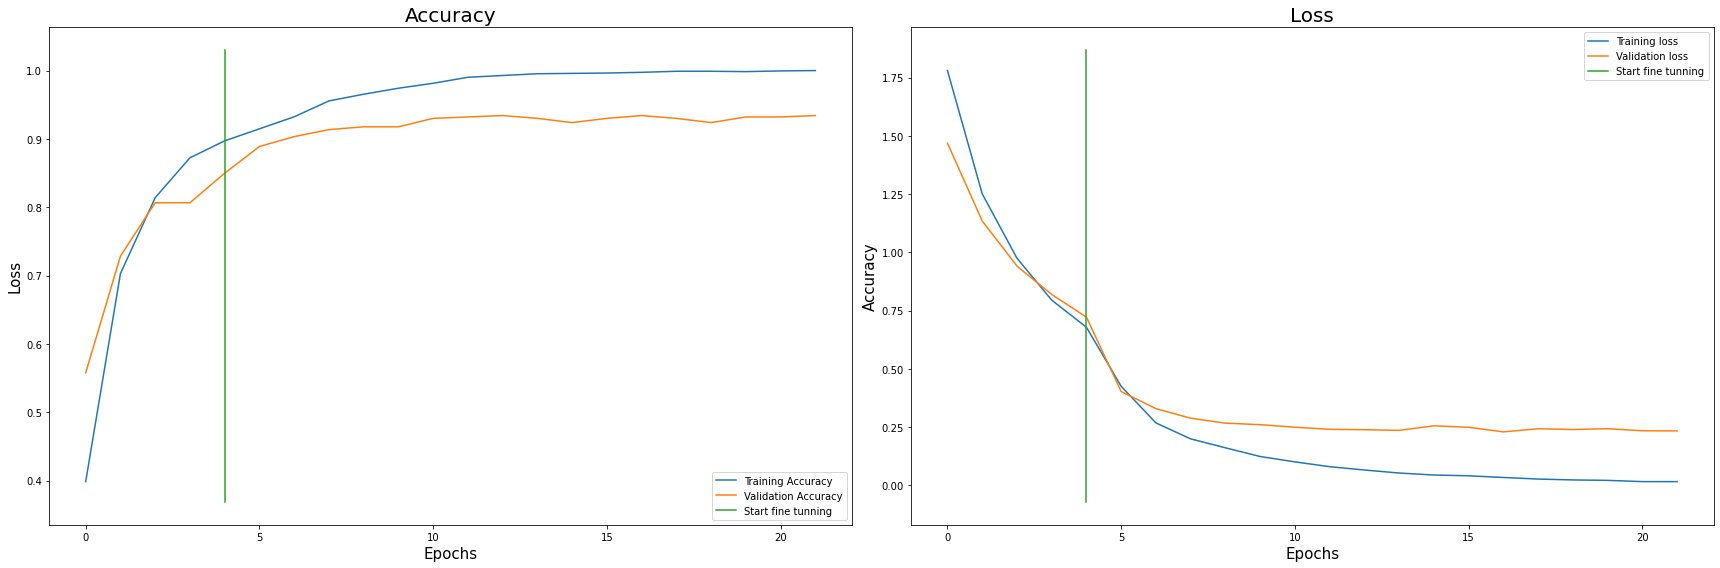

In [95]:
plot_and_compare_history(history_of_model_1,history_of_model_2,initial_epoch=EPOCHS)

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 11. Analyzing the Predictions <hr></span>

In [96]:
# Generates output predictions for the input samples (test data)
pred_proba=model.predict(test_data)
pred_proba[:2]

16/16 [==============================] - 1783s 110s/step


array([[9.9881446e-01, 2.0107166e-06, 3.2495834e-06, 3.1551451e-08,
        3.9272047e-07, 9.5498096e-04, 2.2279804e-05, 2.0264713e-04],
       [9.9032634e-01, 1.1673113e-06, 1.5742428e-06, 3.7164349e-10,
        2.4102512e-08, 9.5642684e-03, 1.2571052e-05, 9.3984047e-05]],
      dtype=float32)

In [97]:
# converting the prediction probabilities to class number
pred_class_number=tf.argmax(pred_proba,axis=1).numpy() #axis = An integer, the axis to reduce across
pred_class_number[:5]

array([0, 0, 0, 0, 0])

In [98]:
# true labels
y_labels=[]
for _,label in test_data.unbatch():
    y_labels.append(label.numpy().argmax())

y_labels[:5]

[0, 0, 0, 0, 0]

In [99]:
class_names[:4]

['Alfa Tauri', 'Alpine', 'Aston Martin', 'Ferrari']

## <span id='conv-to-ds'  style='font-weight:bold;color:white'> 11.1.Confusion Matrix <hr></span>

In [102]:
    """
    Define Function
    The function plots a confusion matrix
    
    sns.heatmap()
    -> annot: If True, write the data value in each cell
    -> camp: The mapping from data values to color space
    -> fmt: String formatting code to use when adding annotations.
    """

def make_confusion_matrix(y_true,y_preds,class_names):
    
    cm=confusion_matrix(y_true,y_preds)
    plt.figure(figsize=(14,10))
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f') #fmt nessesayry???
    display(HTML("<h2 style='font-weight:bold; color:white; text-align:center;'>Confusion Matrix</h2><hr>"))
    plt.ylabel("True values",size=15)
    plt.xlabel('Predicted values',size=15)
    plt.xticks(ticks=np.arange(len(class_names))+0.5,labels=class_names,rotation=60)
    plt.yticks(ticks=np.arange(len(class_names))+0.5,labels=class_names,rotation=0)

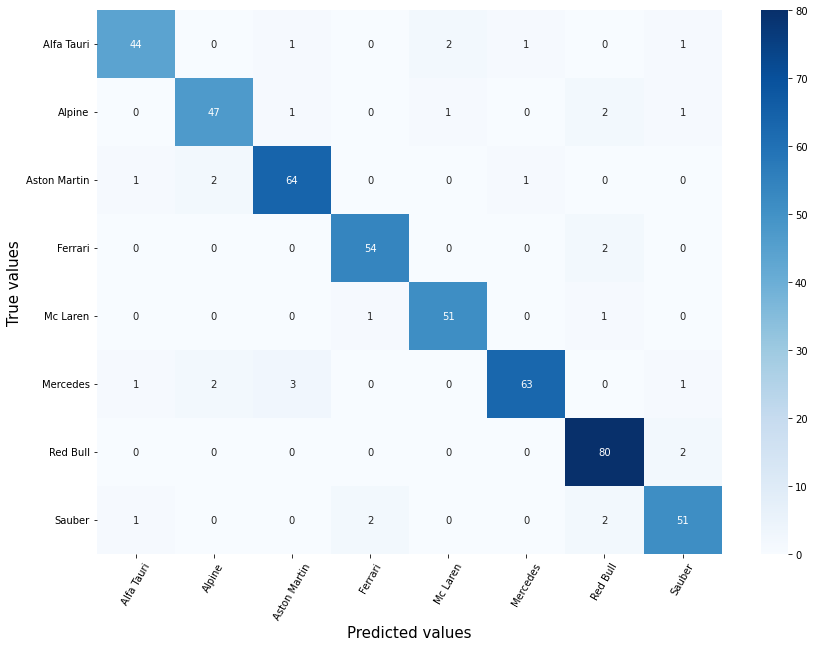

In [103]:
#plot confusion matrix
make_confusion_matrix(y_labels,pred_class_number,class_names)